#### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Importing Data

In [2]:
data=pd.read_csv("iris.csv")

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Exploration

In [4]:
#Shape of the data
data.shape

(150, 6)

In [5]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#checking null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Summary statistics of the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
print("The no.of unique values in the dataset species:",data['Species'].nunique())
print("The unique values in dataset species",data['Species'].unique())


The no.of unique values in the dataset species: 3
The unique values in dataset species ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Explaratory Data Analysis

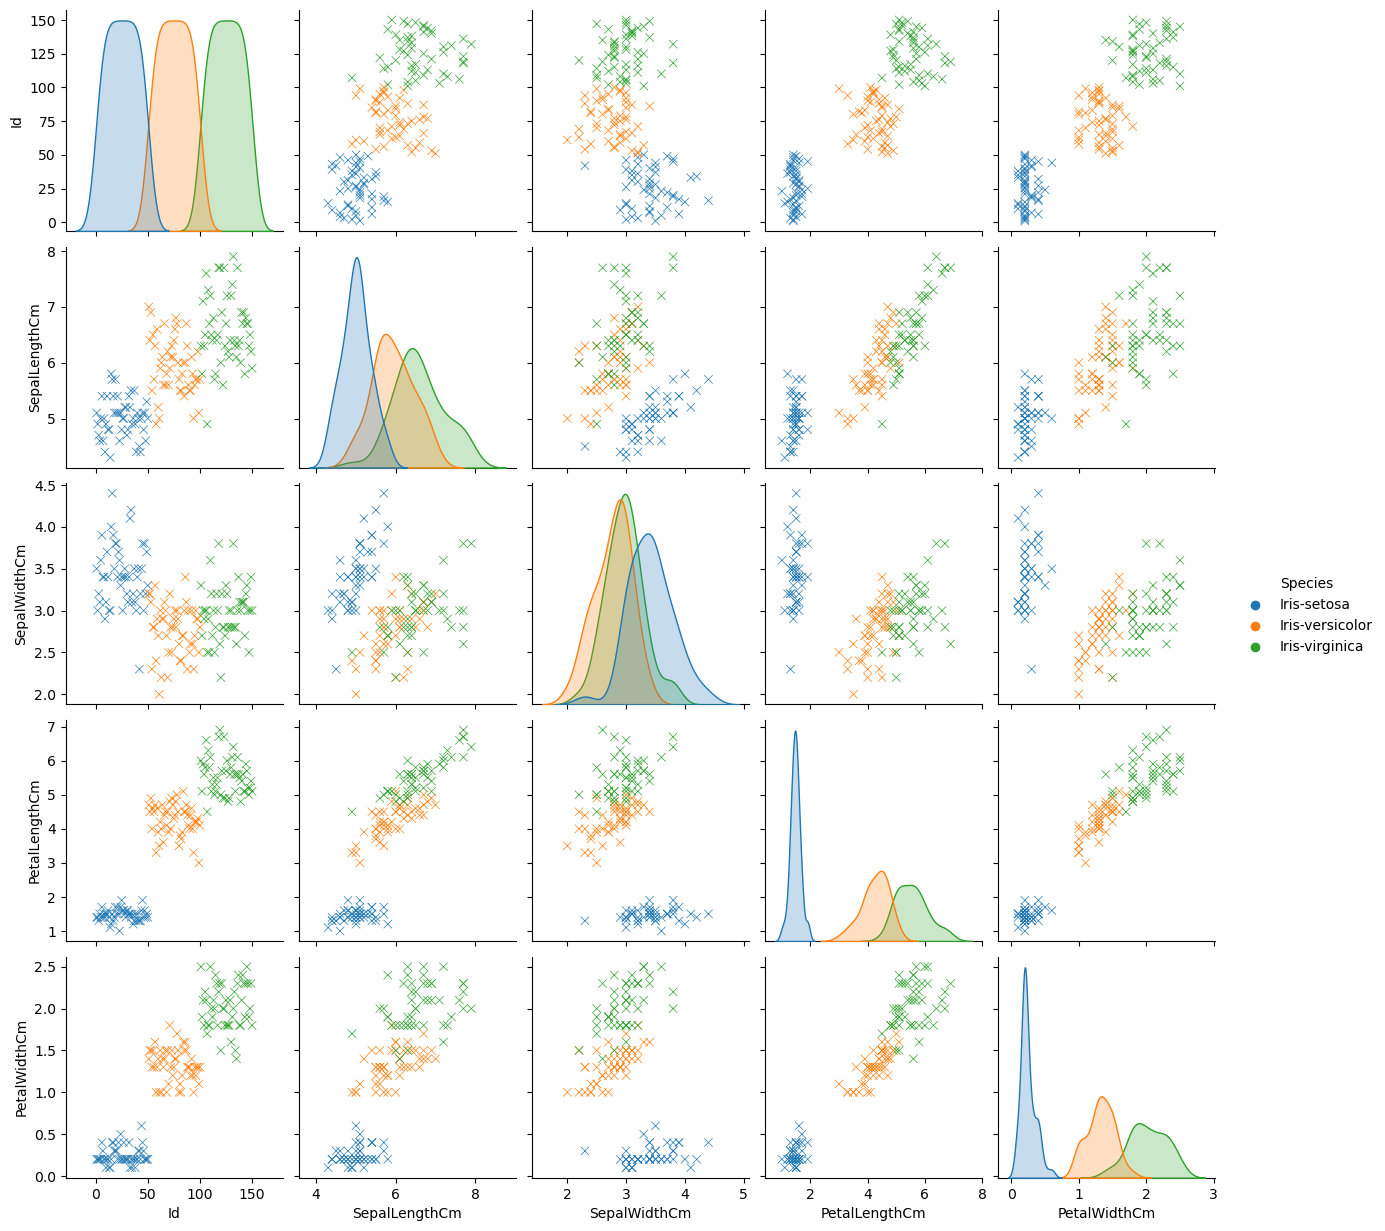

In [9]:
sns.pairplot(data,hue='Species',markers='x')
plt.show()

In [10]:
labels=data['Species'].value_counts()

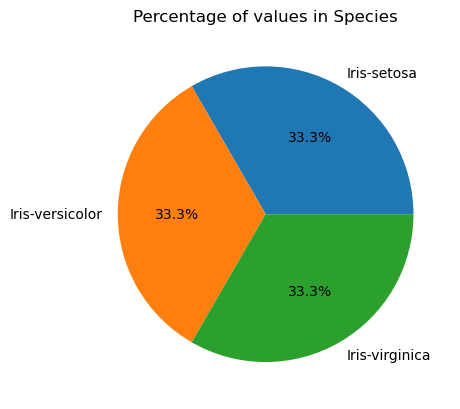

In [11]:
plt.pie(data['Species'].value_counts(),labels=labels.index,autopct="%1.1f%%")
plt.title("Percentage of values in Species")
plt.show()

C:\Users\cheen\AppData\Local\Temp\ipykernel_11628\1039550968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


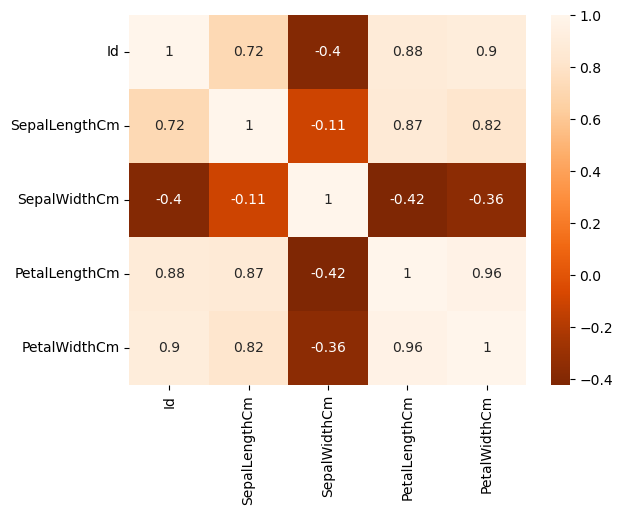

In [12]:
correlation=data.corr()
sns.heatmap(correlation,annot=True,cmap="Oranges_r")
plt.show()

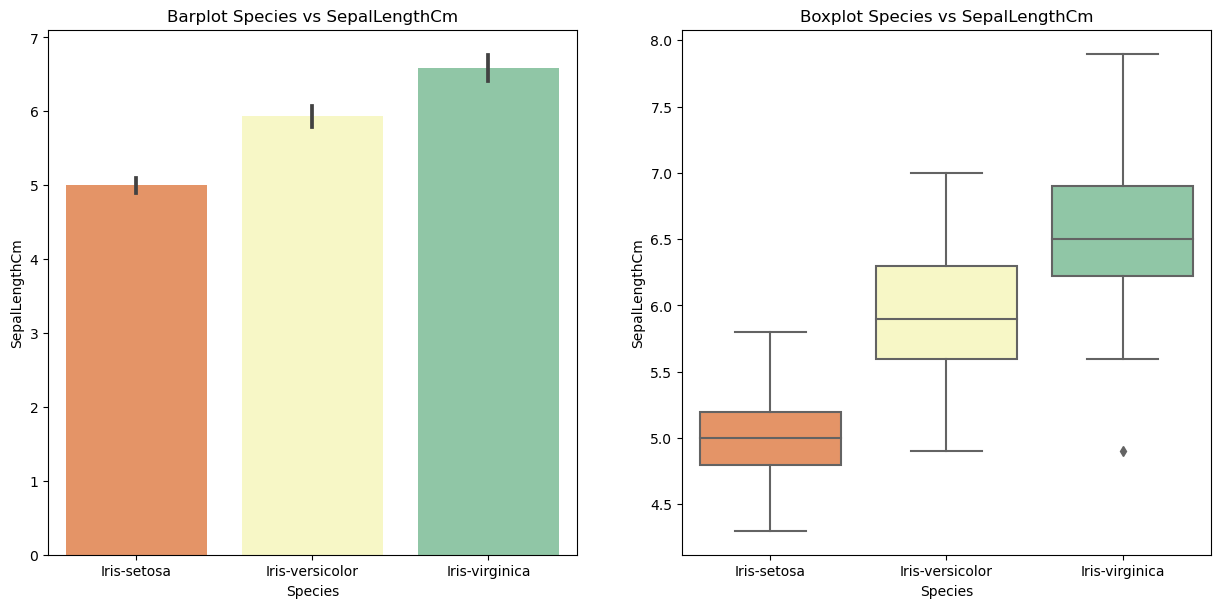

In [13]:
#Barplot Species vs SepalLengthCm
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.barplot(x='Species',y='SepalLengthCm',data=data,palette=("Spectral"))
plt.title("Barplot Species vs SepalLengthCm")
#Boxplot Species vs SepalLengthCm
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalLengthCm',data=data,palette=("Spectral"))
plt.title("Boxplot Species vs SepalLengthCm")
plt.show()

### Data Cleaning

In [14]:
#Data Cleaning
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

In [15]:
x=data.iloc[:,[1,2,3,4]]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y=data.iloc[:,-1]

In [17]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


### Model Building

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
lr_pred=lr.predict(x_test)
print("Logistic Regression successfully completed")
print("confusion matrix:")
lr_conf=confusion_matrix(y_test,lr_pred)
print(lr_conf)
print("Accuracy is :",accuracy_score(y_test,lr_pred))
print("Classification Report is \n",classification_report(y_test,lr_pred))

Logistic Regression successfully completed
confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is : 1.0
Classification Report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
dc_pred=dc.predict(x_test)

In [24]:
print("DecissionTreeClassification successfully completed")
print("confusion matrix:")
dc_conf=confusion_matrix(y_test,dc_pred)
print(dc_conf)
print("Accuracy is :",accuracy_score(y_test,dc_pred))
print("Classification Report is \n",classification_report(y_test,dc_pred))

DecissionTreeClassification successfully completed
confusion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is : 1.0
Classification Report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Result
          Accuracy of Logistic Regression-100%
          Accuracy of DecisionTreeClassifier-100%

## Test Model 

In [25]:
import numpy as np
input_data=(4.9,3.0,1.4,0.2)
input_data_array=np.asarray(input_data)
input_data_array_reshaped=input_data_array.reshape(1,-1)

In [26]:
input_data_array_reshaped

array([[4.9, 3. , 1.4, 0.2]])

In [27]:
prediction=dc.predict(input_data_array_reshaped)
print("The category is:",prediction[0])

The category is: 0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
